# Historical Land Surface Temperature Analysis Around Rahima Moosa Hospital
This notebook analyzes Land Surface Temperature (LST) patterns around Rahima Moosa Hospital across three historical periods.

In [1]:
import ee
import geemap
import numpy as np
from datetime import datetime
from tqdm.notebook import tqdm

# Initialize Earth Engine
try:
    ee.Initialize()
except Exception as e:
    print("Error initializing Earth Engine. Please authenticate first.")
    print("Run 'earthengine authenticate' in your terminal.")
    raise e

In [2]:
# Define constants
HOSPITAL_LAT = -26.1752
HOSPITAL_LON = 28.0183
JOBURG_CENTER = ee.Geometry.Point([HOSPITAL_LON, HOSPITAL_LAT])
BUFFER_DISTANCE = 5000  # 5km buffer
JOBURG_AREA = JOBURG_CENTER.buffer(BUFFER_DISTANCE)

# Define a more pronounced color palette for LST
LST_PALETTE = [
    '#313695',  # Deep blue (coldest)
    '#74add1',  # Light blue
    '#fed976',  # Light orange
    '#fd8d3c',  # Orange
    '#f03b20',  # Red-orange
    '#bd0026'   # Deep red (hottest)
]

In [5]:
import ee
import geemap
import numpy as np
from datetime import datetime
from tqdm.notebook import tqdm

# Initialize Earth Engine
try:
    ee.Initialize()
except Exception as e:
    print("Error initializing Earth Engine. Please authenticate first.")
    print("Run 'earthengine authenticate' in your terminal.")
    raise e

# Define constants
HOSPITAL_LAT = -26.1752
HOSPITAL_LON = 28.0183
JOBURG_CENTER = ee.Geometry.Point([HOSPITAL_LON, HOSPITAL_LAT])
BUFFER_DISTANCE = 5000  # 5km buffer
JOBURG_AREA = JOBURG_CENTER.buffer(BUFFER_DISTANCE)

# Define visualization parameters for LST
LST_VIS_PARAMS = {
    'min': 22,
    'max': 38,
    'palette': [
        '#313695',  # Deep blue (coldest)
        '#74add1',  # Light blue
        '#fed976',  # Light orange
        '#fd8d3c',  # Orange
        '#f03b20',  # Red-orange
        '#bd0026'   # Deep red (hottest)
    ]
}

def get_landsat_collection(start_year, end_year, months=[9,10,11,12,1,2]):
    """Get Landsat collection for the specified time period."""
    # Use Landsat 8 for recent and Landsat 5 for historical
    if start_year >= 2013:
        collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
        thermal_band = 'ST_B10'
    else:
        collection = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2')
        thermal_band = 'ST_B6'
    
    mult = 0.00341802
    add = 149.0
    
    # Filter by date and area
    filtered = collection.filterBounds(JOBURG_AREA) \
        .filter(ee.Filter.calendarRange(start_year, end_year, 'year')) \
        .filter(ee.Filter.calendarRange(months[0], months[-1], 'month'))
    
    return filtered, thermal_band, mult, add

def calculate_lst(image, thermal_band, mult, add):
    """Calculate Land Surface Temperature in Celsius."""
    lst = image.select(thermal_band).multiply(mult).add(add).subtract(273.15)
    return image.addBands(lst.rename('LST'))

def create_lst_map(start_year, end_year, title):
    """Create a map showing LST for the specified period."""
    Map = geemap.Map(center=[HOSPITAL_LAT, HOSPITAL_LON], zoom=13)
    Map.add_basemap('HYBRID')
    
    # Get data
    collection, thermal_band, mult, add = get_landsat_collection(start_year, end_year)
    processed = collection.map(lambda img: calculate_lst(img, thermal_band, mult, add))
    
    # Calculate mean LST
    mean_lst = processed.select('LST').mean()
    
    # Add LST layer with pronounced colors
    Map.addLayer(
        mean_lst, 
        LST_VIS_PARAMS,
        f'LST ({start_year}-{end_year})'
    )
    
    # Add hospital marker and buffer
    circle = ee.Geometry.Point([HOSPITAL_LON, HOSPITAL_LAT]).buffer(BUFFER_DISTANCE)
    Map.addLayer(circle, {'color': 'white', 'fillColor': '00000000'}, '5km Buffer')
    hospital = ee.Geometry.Point([HOSPITAL_LON, HOSPITAL_LAT])
    Map.addLayer(hospital, {'color': 'white'}, 'Rahima Moosa Hospital')
    
    # Add colorbar using vis_params
    Map.add_colorbar(
        vis_params=LST_VIS_PARAMS,
        label='Land Surface Temperature (°C)',
        orientation='horizontal',
        transparent_bg=True
    )
    
    return Map

# Create maps for three periods
Map1 = create_lst_map(1990, 1999, 'Early Period')
display(Map1)

Map2 = create_lst_map(2000, 2009, 'Mid Period')
display(Map2)

Map3 = create_lst_map(2014, 2023, 'Recent Period')
display(Map3)

Map(center=[-26.1752, 28.0183], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

Map(center=[-26.1752, 28.0183], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

Map(center=[-26.1752, 28.0183], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Early Period (1990-1999)

TypeError: Colorbar.__init__() got an unexpected keyword argument 'colors'

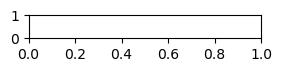

In [4]:
Map1 = create_lst_map(1990, 1999, 'Early Period')
Map1

## Mid Period (2000-2009)

In [ ]:
Map2 = create_lst_map(2000, 2009, 'Mid Period')
Map2

## Recent Period (2014-2023)

In [ ]:
Map3 = create_lst_map(2014, 2023, 'Recent Period')
Map3